<a href="https://colab.research.google.com/github/CamiloDlRM/Parcial_3_IA/blob/main/Python_vs_C_PCA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Librerias Importadas**

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA


# **Creación datos sinteticos**

In [5]:
np.random.seed(42)


data = np.random.randn(100, 4)


data[:, 1] = data[:, 0] + 0.5 * np.random.randn(100)
data[:, 3] = data[:, 2] + 0.3 * np.random.randn(100)

np.savetxt('input_data.csv', data, delimiter=',', fmt='%.6f')

# **Compilación y ejecución de archivo C**

In [6]:
!gcc -o pca pca.c -lm

In [7]:
!./pca input_data.csv output_data.csv 2

algoritmo PCA en C ===
Archivo de entrada: input_data.csv
Archivo de salida: output_data.csv
Número de componentes: 2
Dimensiones detectadas: 100 filas, 4 columnas
Datos originales: 100 muestras, 4 dimensiones
Reduciendo a 2 dimensiones
1. Centrando los datos...
2. Calculando matriz de covarianza...
Matriz de covarianza: 4x4
3. Encontrando 2 componentes principales...
   Componente 1: eigenvalor = 2.281234
   Componente 2: eigenvalor = 1.681844
4. Proyectando datos...
Datos proyectados: 100x2
Datos guardados en output_data.csv


# **Comparación de PCA con C vs python**

Datos leídos: (100, 4)
Resultado C: (100, 2)
Resultado sklearn: (100, 2)
Varianza explicada por componente: [0.55309881 0.40777309]
Varianza total explicada: 0.9609

COMPARACIÓN LENGUAJE C vs SKLEARN
MSE: 7.77e-14
Correlaciones: [np.float64(0.9999999999999846), np.float64(0.999999999999975)]
Correlación promedio: 1.000000


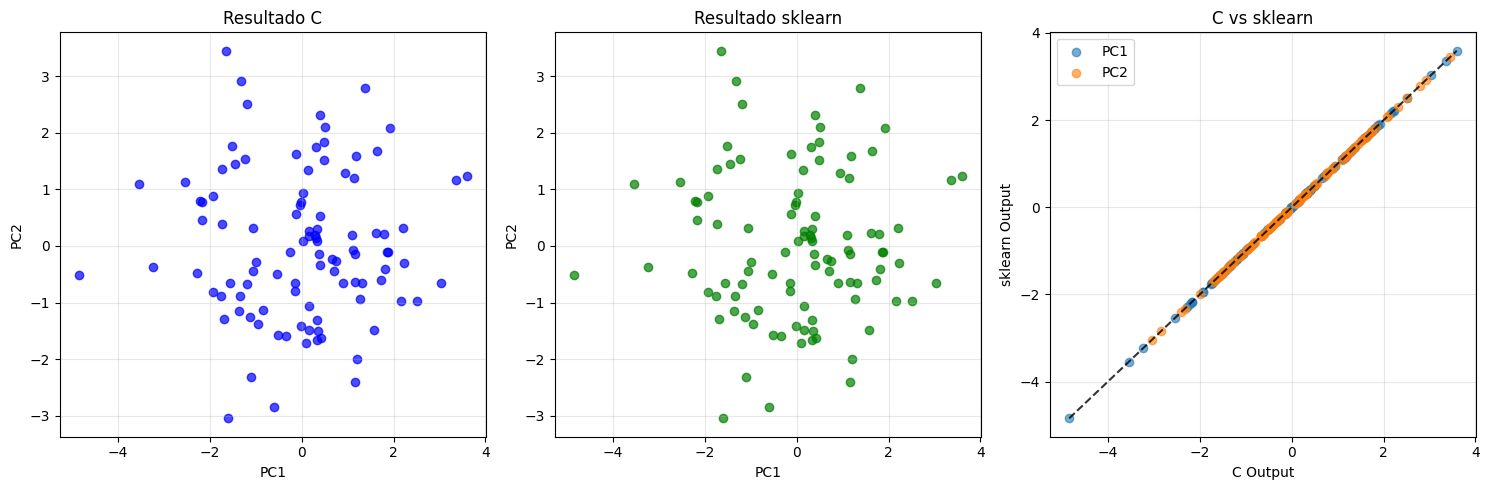

PRIMEROS 10 RESULTADOS
C Output:
[[ 1.108225 -0.076443]
 [ 2.507039 -0.976697]
 [-1.060329 -0.447164]
 [-2.216714  0.799223]
 [-1.684501 -1.288823]
 [ 0.393989  2.304187]
 [-1.939066 -0.816564]
 [-1.180762 -0.669467]
 [ 1.160168 -0.143005]
 [-1.938698  0.881685]]
sklearn Output:
[[ 1.1082247  -0.07644272]
 [ 2.50703857 -0.97669675]
 [-1.06032894 -0.4471638 ]
 [-2.21671406  0.79922258]
 [-1.68450135 -1.28882301]
 [ 0.39398945  2.30418663]
 [-1.93906568 -0.81656369]
 [-1.1807624  -0.66946684]
 [ 1.16016788 -0.14300528]
 [-1.93869803  0.88168452]]
Diferencia:
[[2.96921579e-07 2.83579144e-07]
 [4.32891721e-07 2.49981899e-07]
 [5.84627440e-08 2.02572419e-07]
 [6.08572202e-08 4.23150941e-07]
 [3.48939624e-07 8.59322236e-09]
 [4.51255909e-07 3.73091643e-07]
 [3.21114600e-07 3.13467162e-07]
 [4.00171873e-07 1.63672407e-07]
 [1.19569832e-07 2.79863735e-07]
 [2.89689044e-08 4.78076836e-07]]
Componentes principales (eigenvectors):
[[ 0.10293371  0.14286791  0.675791    0.71575131]
 [ 0.62382919  

In [8]:
input_data = np.loadtxt('input_data.csv', delimiter=',')
c_output = np.loadtxt('output_data.csv', delimiter=',')

print(f"Datos leídos: {input_data.shape}")
print(f"Resultado C: {c_output.shape}")


n_components = c_output.shape[1]
pca = PCA(n_components=n_components)
sklearn_output = pca.fit_transform(input_data)

print(f"Resultado sklearn: {sklearn_output.shape}")
print(f"Varianza explicada por componente: {pca.explained_variance_ratio_}")
print(f"Varianza total explicada: {sum(pca.explained_variance_ratio_):.4f}")


for i in range(n_components):
    correlation = np.corrcoef(c_output[:, i], sklearn_output[:, i])[0, 1]
    if correlation < 0:
        sklearn_output[:, i] *= -1

mse = np.mean((c_output - sklearn_output) ** 2)
correlations = [np.corrcoef(c_output[:, i], sklearn_output[:, i])[0, 1] for i in range(n_components)]

print(f"\nCOMPARACIÓN LENGUAJE C vs SKLEARN")
print(f"MSE: {mse:.2e}")
print(f"Correlaciones: {correlations}")
print(f"Correlación promedio: {np.mean(correlations):.6f}")


fig, axes = plt.subplots(1, 3, figsize=(15, 5))

axes[0].scatter(c_output[:, 0], c_output[:, 1], alpha=0.7, color='blue')
axes[0].set_title('Resultado C')
axes[0].set_xlabel('PC1')
axes[0].set_ylabel('PC2')
axes[0].grid(True, alpha=0.3)

axes[1].scatter(sklearn_output[:, 0], sklearn_output[:, 1], alpha=0.7, color='green')
axes[1].set_title('Resultado sklearn')
axes[1].set_xlabel('PC1')
axes[1].set_ylabel('PC2')
axes[1].grid(True, alpha=0.3)

# Comparación directa
axes[2].scatter(c_output[:, 0], sklearn_output[:, 0], alpha=0.6, label='PC1')
axes[2].scatter(c_output[:, 1], sklearn_output[:, 1], alpha=0.6, label='PC2')
min_val = min(c_output.min(), sklearn_output.min())
max_val = max(c_output.max(), sklearn_output.max())
axes[2].plot([min_val, max_val], [min_val, max_val], 'k--', alpha=0.8)
axes[2].set_xlabel('C Output')
axes[2].set_ylabel('sklearn Output')
axes[2].set_title('C vs sklearn')
axes[2].legend()
axes[2].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

print(f"PRIMEROS 10 RESULTADOS")
print("C Output:")
print(c_output[:10])
print("sklearn Output:")
print(sklearn_output[:10])
print("Diferencia:")
print(np.abs(c_output[:10] - sklearn_output[:10]))

print(f"Componentes principales (eigenvectors):")
print(pca.components_)
print(f"\nMedia de los datos originales:")
print(pca.mean_)